<h1>Using LightGBM classifier on credit card user data to predict default rate. </h1>

This notebook explores an application of the LightGBM package by Microsoft with a clean dataset on credit card defaults. Since we are trying to predict if a person is defaulting or not, we will want to use binary classification. This notebook also explores early stopping, a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration. 


Dataset source: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients. 

In [161]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import auc, accuracy_score, roc_auc_score

In [162]:
data = pd.read_excel('ccdata.xls', header = 1)

In [126]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.


In [128]:
data.drop('ID', axis = 1, inplace = True)

In [129]:
# Check for null values.
data.isnull().sum().sort_values(ascending=False)

default payment next month    0
PAY_AMT6                      0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
LIMIT_BAL                     0
dtype: int64

In [130]:
X = data.drop(['default payment next month'], axis=1)
y = data['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

<h2>LightGBM classifier hyperparameter optimization via scikit-learn's GridSearchCV</h2>

In [233]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)

param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)



[1]	valid_0's binary_logloss: 0.649789	valid_0's auc: 0.767642
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.614426	valid_0's auc: 0.774952
[3]	valid_0's binary_logloss: 0.585286	valid_0's auc: 0.776493
[4]	valid_0's binary_logloss: 0.560933	valid_0's auc: 0.778814
[5]	valid_0's binary_logloss: 0.540647	valid_0's auc: 0.778574
[6]	valid_0's binary_logloss: 0.523812	valid_0's auc: 0.779238
[7]	valid_0's binary_logloss: 0.509301	valid_0's auc: 0.779437
[8]	valid_0's binary_logloss: 0.497126	valid_0's auc: 0.780686
[9]	valid_0's binary_logloss: 0.486988	valid_0's auc: 0.780432
[10]	valid_0's binary_logloss: 0.478184	valid_0's auc: 0.780897
[11]	valid_0's binary_logloss: 0.470716	valid_0's auc: 0.781529
[12]	valid_0's binary_logloss: 0.464407	valid_0's auc: 0.781628
[13]	valid_0's binary_logloss: 0.45896	valid_0's auc: 0.781362
[14]	valid_0's binary_logloss: 0.45427	valid_0's auc: 0.782267
[15]	valid_0's binary_logloss: 0.450419	valid_0's auc:

[14]	valid_0's binary_logloss: 0.45427	valid_0's auc: 0.782267
[15]	valid_0's binary_logloss: 0.450419	valid_0's auc: 0.782118
[16]	valid_0's binary_logloss: 0.447225	valid_0's auc: 0.782052
[17]	valid_0's binary_logloss: 0.444687	valid_0's auc: 0.78116
[18]	valid_0's binary_logloss: 0.442422	valid_0's auc: 0.780831
[19]	valid_0's binary_logloss: 0.440363	valid_0's auc: 0.78067
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.45427	valid_0's auc: 0.782267
[1]	valid_0's binary_logloss: 0.649421	valid_0's auc: 0.768369
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.613959	valid_0's auc: 0.772182
[3]	valid_0's binary_logloss: 0.584496	valid_0's auc: 0.776445
[4]	valid_0's binary_logloss: 0.559841	valid_0's auc: 0.777212
[5]	valid_0's binary_logloss: 0.539602	valid_0's auc: 0.776527
[6]	valid_0's binary_logloss: 0.522292	valid_0's auc: 0.77821
[7]	valid_0's binary_logloss: 0.507917	valid_0's auc: 0.777514
[8]	valid_0's binary

[1]	valid_0's binary_logloss: 0.649785	valid_0's auc: 0.763112
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.614375	valid_0's auc: 0.771282
[3]	valid_0's binary_logloss: 0.585293	valid_0's auc: 0.775338
[4]	valid_0's binary_logloss: 0.560775	valid_0's auc: 0.77729
[5]	valid_0's binary_logloss: 0.540252	valid_0's auc: 0.778958
[6]	valid_0's binary_logloss: 0.523158	valid_0's auc: 0.779594
[7]	valid_0's binary_logloss: 0.508573	valid_0's auc: 0.779915
[8]	valid_0's binary_logloss: 0.496274	valid_0's auc: 0.780711
[9]	valid_0's binary_logloss: 0.485812	valid_0's auc: 0.780732
[10]	valid_0's binary_logloss: 0.47705	valid_0's auc: 0.781187
[11]	valid_0's binary_logloss: 0.469606	valid_0's auc: 0.781117
[12]	valid_0's binary_logloss: 0.463305	valid_0's auc: 0.780924
[13]	valid_0's binary_logloss: 0.458013	valid_0's auc: 0.781048
[14]	valid_0's binary_logloss: 0.453402	valid_0's auc: 0.781233
[15]	valid_0's binary_logloss: 0.449763	valid_0's auc:

[1]	valid_0's binary_logloss: 0.649785	valid_0's auc: 0.763112
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.614375	valid_0's auc: 0.771282
[3]	valid_0's binary_logloss: 0.585293	valid_0's auc: 0.775338
[4]	valid_0's binary_logloss: 0.560775	valid_0's auc: 0.77729
[5]	valid_0's binary_logloss: 0.540252	valid_0's auc: 0.778958
[6]	valid_0's binary_logloss: 0.523158	valid_0's auc: 0.779594
[7]	valid_0's binary_logloss: 0.508573	valid_0's auc: 0.779915
[8]	valid_0's binary_logloss: 0.496274	valid_0's auc: 0.780711
[9]	valid_0's binary_logloss: 0.485812	valid_0's auc: 0.780732
[10]	valid_0's binary_logloss: 0.47705	valid_0's auc: 0.781187
[11]	valid_0's binary_logloss: 0.469606	valid_0's auc: 0.781117
[12]	valid_0's binary_logloss: 0.463305	valid_0's auc: 0.780924
[13]	valid_0's binary_logloss: 0.458013	valid_0's auc: 0.781048
[14]	valid_0's binary_logloss: 0.453402	valid_0's auc: 0.781233
[15]	valid_0's binary_logloss: 0.449763	valid_0's auc:

[1]	valid_0's binary_logloss: 0.639672	valid_0's auc: 0.763112
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.598245	valid_0's auc: 0.771614
[3]	valid_0's binary_logloss: 0.565632	valid_0's auc: 0.775656
[4]	valid_0's binary_logloss: 0.539597	valid_0's auc: 0.777592
[5]	valid_0's binary_logloss: 0.518708	valid_0's auc: 0.778959
[6]	valid_0's binary_logloss: 0.501744	valid_0's auc: 0.779544
[7]	valid_0's binary_logloss: 0.487923	valid_0's auc: 0.779956
[8]	valid_0's binary_logloss: 0.476723	valid_0's auc: 0.780474
[9]	valid_0's binary_logloss: 0.467871	valid_0's auc: 0.780442
[10]	valid_0's binary_logloss: 0.460885	valid_0's auc: 0.779252
[11]	valid_0's binary_logloss: 0.454956	valid_0's auc: 0.779808
[12]	valid_0's binary_logloss: 0.449848	valid_0's auc: 0.780915
[13]	valid_0's binary_logloss: 0.445775	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.442673	valid_0's auc: 0.781524
[15]	valid_0's binary_logloss: 0.439846	valid_0's au

[1]	valid_0's binary_logloss: 0.639672	valid_0's auc: 0.763112
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.598245	valid_0's auc: 0.771614
[3]	valid_0's binary_logloss: 0.565632	valid_0's auc: 0.775656
[4]	valid_0's binary_logloss: 0.539597	valid_0's auc: 0.777592
[5]	valid_0's binary_logloss: 0.518708	valid_0's auc: 0.778959
[6]	valid_0's binary_logloss: 0.501744	valid_0's auc: 0.779544
[7]	valid_0's binary_logloss: 0.487923	valid_0's auc: 0.779956
[8]	valid_0's binary_logloss: 0.476723	valid_0's auc: 0.780474
[9]	valid_0's binary_logloss: 0.467871	valid_0's auc: 0.780442
[10]	valid_0's binary_logloss: 0.460885	valid_0's auc: 0.779252
[11]	valid_0's binary_logloss: 0.454956	valid_0's auc: 0.779808
[12]	valid_0's binary_logloss: 0.449848	valid_0's auc: 0.780915
[13]	valid_0's binary_logloss: 0.445775	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.442673	valid_0's auc: 0.781524
[15]	valid_0's binary_logloss: 0.439846	valid_0's au

[25]	valid_0's binary_logloss: 0.429447	valid_0's auc: 0.784004
[26]	valid_0's binary_logloss: 0.429478	valid_0's auc: 0.783375
[27]	valid_0's binary_logloss: 0.429564	valid_0's auc: 0.782648
[28]	valid_0's binary_logloss: 0.42954	valid_0's auc: 0.782855
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.429837	valid_0's auc: 0.784221
[1]	valid_0's binary_logloss: 0.639672	valid_0's auc: 0.763112
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.598245	valid_0's auc: 0.771614
[3]	valid_0's binary_logloss: 0.565632	valid_0's auc: 0.775656
[4]	valid_0's binary_logloss: 0.539597	valid_0's auc: 0.777592
[5]	valid_0's binary_logloss: 0.518708	valid_0's auc: 0.778959
[6]	valid_0's binary_logloss: 0.501744	valid_0's auc: 0.779544
[7]	valid_0's binary_logloss: 0.487923	valid_0's auc: 0.779956
[8]	valid_0's binary_logloss: 0.476723	valid_0's auc: 0.780474
[9]	valid_0's binary_logloss: 0.467871	valid_0's auc: 0.780442
[10]	valid_0's bin

[17]	valid_0's binary_logloss: 0.436599	valid_0's auc: 0.780813
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.450001	valid_0's auc: 0.782079
[1]	valid_0's binary_logloss: 0.639222	valid_0's auc: 0.768369
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.597638	valid_0's auc: 0.772138
[3]	valid_0's binary_logloss: 0.564656	valid_0's auc: 0.77651
[4]	valid_0's binary_logloss: 0.538372	valid_0's auc: 0.777328
[5]	valid_0's binary_logloss: 0.517478	valid_0's auc: 0.779129
[6]	valid_0's binary_logloss: 0.500668	valid_0's auc: 0.779421
[7]	valid_0's binary_logloss: 0.487178	valid_0's auc: 0.779652
[8]	valid_0's binary_logloss: 0.476105	valid_0's auc: 0.780808
[9]	valid_0's binary_logloss: 0.467173	valid_0's auc: 0.781148
[10]	valid_0's binary_logloss: 0.459944	valid_0's auc: 0.7815
[11]	valid_0's binary_logloss: 0.45407	valid_0's auc: 0.780821
[12]	valid_0's binary_logloss: 0.449327	valid_0's auc: 0.781084
[13]	valid_0's binary

[15]	valid_0's binary_logloss: 0.439846	valid_0's auc: 0.782403
[16]	valid_0's binary_logloss: 0.437486	valid_0's auc: 0.782931
[17]	valid_0's binary_logloss: 0.435786	valid_0's auc: 0.78293
[18]	valid_0's binary_logloss: 0.434219	valid_0's auc: 0.783142
[19]	valid_0's binary_logloss: 0.432833	valid_0's auc: 0.783785
[20]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.78374
[21]	valid_0's binary_logloss: 0.431005	valid_0's auc: 0.784119
[22]	valid_0's binary_logloss: 0.430258	valid_0's auc: 0.784453
[23]	valid_0's binary_logloss: 0.429435	valid_0's auc: 0.784841
[24]	valid_0's binary_logloss: 0.428629	valid_0's auc: 0.785665
[25]	valid_0's binary_logloss: 0.428197	valid_0's auc: 0.786094
[26]	valid_0's binary_logloss: 0.427956	valid_0's auc: 0.786167
[27]	valid_0's binary_logloss: 0.427775	valid_0's auc: 0.786141
[28]	valid_0's binary_logloss: 0.427918	valid_0's auc: 0.785671
[29]	valid_0's binary_logloss: 0.427653	valid_0's auc: 0.786033
[30]	valid_0's binary_logloss: 0.427658	va

[13]	valid_0's binary_logloss: 0.43793	valid_0's auc: 0.78096
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.461794	valid_0's auc: 0.781461
[1]	valid_0's binary_logloss: 0.629849	valid_0's auc: 0.763112
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.58301	valid_0's auc: 0.771058
[3]	valid_0's binary_logloss: 0.547856	valid_0's auc: 0.777896
[4]	valid_0's binary_logloss: 0.521024	valid_0's auc: 0.78063
[5]	valid_0's binary_logloss: 0.500833	valid_0's auc: 0.779294
[6]	valid_0's binary_logloss: 0.485031	valid_0's auc: 0.77988
[7]	valid_0's binary_logloss: 0.472726	valid_0's auc: 0.779916
[8]	valid_0's binary_logloss: 0.463271	valid_0's auc: 0.779589
[9]	valid_0's binary_logloss: 0.455767	valid_0's auc: 0.780185
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.521024	valid_0's auc: 0.78063
[1]	valid_0's binary_logloss: 0.629849	valid_0's auc: 0.767642
Training until validation scores don't improve for 5 ro

[9]	valid_0's binary_logloss: 0.45442	valid_0's auc: 0.780871
[10]	valid_0's binary_logloss: 0.448738	valid_0's auc: 0.780425
[11]	valid_0's binary_logloss: 0.444527	valid_0's auc: 0.78015
[12]	valid_0's binary_logloss: 0.441139	valid_0's auc: 0.779938
[13]	valid_0's binary_logloss: 0.43793	valid_0's auc: 0.78096
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.461794	valid_0's auc: 0.781461
[1]	valid_0's binary_logloss: 0.629849	valid_0's auc: 0.763112
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.58301	valid_0's auc: 0.771058
[3]	valid_0's binary_logloss: 0.547856	valid_0's auc: 0.777896
[4]	valid_0's binary_logloss: 0.521024	valid_0's auc: 0.78063
[5]	valid_0's binary_logloss: 0.500833	valid_0's auc: 0.779294
[6]	valid_0's binary_logloss: 0.485031	valid_0's auc: 0.77988
[7]	valid_0's binary_logloss: 0.472726	valid_0's auc: 0.779916
[8]	valid_0's binary_logloss: 0.463271	valid_0's auc: 0.779589
[9]	valid_0's binary_logl

[1]	valid_0's binary_logloss: 0.620311	valid_0's auc: 0.767642
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.569375	valid_0's auc: 0.776638
[3]	valid_0's binary_logloss: 0.5329	valid_0's auc: 0.779333
[4]	valid_0's binary_logloss: 0.506334	valid_0's auc: 0.77984
[5]	valid_0's binary_logloss: 0.486637	valid_0's auc: 0.779773
[6]	valid_0's binary_logloss: 0.471707	valid_0's auc: 0.780945
[7]	valid_0's binary_logloss: 0.460753	valid_0's auc: 0.781995
[8]	valid_0's binary_logloss: 0.452194	valid_0's auc: 0.782851
[9]	valid_0's binary_logloss: 0.445849	valid_0's auc: 0.784215
[10]	valid_0's binary_logloss: 0.441534	valid_0's auc: 0.782732
[11]	valid_0's binary_logloss: 0.437885	valid_0's auc: 0.783262
[12]	valid_0's binary_logloss: 0.4354	valid_0's auc: 0.782602
[13]	valid_0's binary_logloss: 0.433243	valid_0's auc: 0.783766
[14]	valid_0's binary_logloss: 0.431561	valid_0's auc: 0.784039
Early stopping, best iteration is:
[9]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.619696	valid_0's auc: 0.768369
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.56842	valid_0's auc: 0.77498
[3]	valid_0's binary_logloss: 0.53167	valid_0's auc: 0.776047
[4]	valid_0's binary_logloss: 0.505025	valid_0's auc: 0.777343
[5]	valid_0's binary_logloss: 0.485596	valid_0's auc: 0.779093
[6]	valid_0's binary_logloss: 0.470977	valid_0's auc: 0.780084
[7]	valid_0's binary_logloss: 0.460595	valid_0's auc: 0.778531
[8]	valid_0's binary_logloss: 0.452472	valid_0's auc: 0.778941
[9]	valid_0's binary_logloss: 0.446525	valid_0's auc: 0.779022
[10]	valid_0's binary_logloss: 0.441577	valid_0's auc: 0.780849
[11]	valid_0's binary_logloss: 0.438298	valid_0's auc: 0.780551
[12]	valid_0's binary_logloss: 0.435808	valid_0's auc: 0.780933
[13]	valid_0's binary_logloss: 0.434024	valid_0's auc: 0.781037
[14]	valid_0's binary_logloss: 0.432828	valid_0's auc: 0.780921
[15]	valid_0's binary_logloss: 0.431938	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.620314	valid_0's auc: 0.763112
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.569438	valid_0's auc: 0.772475
[3]	valid_0's binary_logloss: 0.532819	valid_0's auc: 0.775966
[4]	valid_0's binary_logloss: 0.505923	valid_0's auc: 0.778291
[5]	valid_0's binary_logloss: 0.485861	valid_0's auc: 0.780397
[6]	valid_0's binary_logloss: 0.471363	valid_0's auc: 0.780277
[7]	valid_0's binary_logloss: 0.460631	valid_0's auc: 0.779919
[8]	valid_0's binary_logloss: 0.452062	valid_0's auc: 0.781162
[9]	valid_0's binary_logloss: 0.446219	valid_0's auc: 0.781384
[10]	valid_0's binary_logloss: 0.441387	valid_0's auc: 0.783286
[11]	valid_0's binary_logloss: 0.437729	valid_0's auc: 0.783801
[12]	valid_0's binary_logloss: 0.435733	valid_0's auc: 0.782412
[13]	valid_0's binary_logloss: 0.433934	valid_0's auc: 0.782276
[14]	valid_0's binary_logloss: 0.432342	valid_0's auc: 0.782777
[15]	valid_0's binary_logloss: 0.431161	valid_0's au

[19]	valid_0's binary_logloss: 0.42888	valid_0's auc: 0.783987
[20]	valid_0's binary_logloss: 0.428272	valid_0's auc: 0.784865
[21]	valid_0's binary_logloss: 0.428154	valid_0's auc: 0.784871
[22]	valid_0's binary_logloss: 0.428055	valid_0's auc: 0.784763
[23]	valid_0's binary_logloss: 0.428296	valid_0's auc: 0.784685
[24]	valid_0's binary_logloss: 0.428441	valid_0's auc: 0.784586
[25]	valid_0's binary_logloss: 0.42853	valid_0's auc: 0.784276
[26]	valid_0's binary_logloss: 0.428463	valid_0's auc: 0.784426
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.428154	valid_0's auc: 0.784871
[1]	valid_0's binary_logloss: 0.620311	valid_0's auc: 0.767642
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.569375	valid_0's auc: 0.776638
[3]	valid_0's binary_logloss: 0.5329	valid_0's auc: 0.779333
[4]	valid_0's binary_logloss: 0.506334	valid_0's auc: 0.77984
[5]	valid_0's binary_logloss: 0.486637	valid_0's auc: 0.779773
[6]	valid_0's bina

[1]	valid_0's binary_logloss: 0.610367	valid_0's auc: 0.768369
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.555688	valid_0's auc: 0.774361
[3]	valid_0's binary_logloss: 0.518411	valid_0's auc: 0.774963
[4]	valid_0's binary_logloss: 0.49246	valid_0's auc: 0.777183
[5]	valid_0's binary_logloss: 0.474253	valid_0's auc: 0.779215
[6]	valid_0's binary_logloss: 0.461348	valid_0's auc: 0.7787
[7]	valid_0's binary_logloss: 0.452155	valid_0's auc: 0.778044
[8]	valid_0's binary_logloss: 0.445592	valid_0's auc: 0.778364
[9]	valid_0's binary_logloss: 0.441594	valid_0's auc: 0.777499
[10]	valid_0's binary_logloss: 0.437829	valid_0's auc: 0.778873
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.474253	valid_0's auc: 0.779215
[1]	valid_0's binary_logloss: 0.611066	valid_0's auc: 0.763112
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.556807	valid_0's auc: 0.773494
[3]	valid_0's binary_loglo

[1]	valid_0's binary_logloss: 0.610367	valid_0's auc: 0.768369
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.555688	valid_0's auc: 0.774361
[3]	valid_0's binary_logloss: 0.518411	valid_0's auc: 0.774963
[4]	valid_0's binary_logloss: 0.49246	valid_0's auc: 0.777183
[5]	valid_0's binary_logloss: 0.474253	valid_0's auc: 0.779215
[6]	valid_0's binary_logloss: 0.461348	valid_0's auc: 0.7787
[7]	valid_0's binary_logloss: 0.452155	valid_0's auc: 0.778044
[8]	valid_0's binary_logloss: 0.445592	valid_0's auc: 0.778364
[9]	valid_0's binary_logloss: 0.441594	valid_0's auc: 0.777499
[10]	valid_0's binary_logloss: 0.437829	valid_0's auc: 0.778873
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.474253	valid_0's auc: 0.779215
[1]	valid_0's binary_logloss: 0.611066	valid_0's auc: 0.763112
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.556807	valid_0's auc: 0.773494
[3]	valid_0's binary_loglo

[1]	valid_0's binary_logloss: 0.610367	valid_0's auc: 0.768369
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.555688	valid_0's auc: 0.774361
[3]	valid_0's binary_logloss: 0.518411	valid_0's auc: 0.774963
[4]	valid_0's binary_logloss: 0.49246	valid_0's auc: 0.777183
[5]	valid_0's binary_logloss: 0.474253	valid_0's auc: 0.779215
[6]	valid_0's binary_logloss: 0.461348	valid_0's auc: 0.7787
[7]	valid_0's binary_logloss: 0.452155	valid_0's auc: 0.778044
[8]	valid_0's binary_logloss: 0.445592	valid_0's auc: 0.778364
[9]	valid_0's binary_logloss: 0.441594	valid_0's auc: 0.777499
[10]	valid_0's binary_logloss: 0.437829	valid_0's auc: 0.778873
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.474253	valid_0's auc: 0.779215
[1]	valid_0's binary_logloss: 0.611066	valid_0's auc: 0.763112
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.556807	valid_0's auc: 0.773494
[3]	valid_0's binary_loglo

GridSearchCV(cv=None, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0,
        learning_rate=0.125, max_bin=255, max_depth=-1, metric='l1',
        min_child_samples=10, min_child_weight=5, min_split_gain=0.0,
        n_estimators=20, n_jobs=-1, num_leaves=38, objective=None,
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=50000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 22, 24, 26, 28, 30, 32, 34], 'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [234]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.125, 'n_estimators': 20}


<h2>LightGBM Hyperparameters + early stopping</h2>

In [225]:

gbm = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)


[1]	valid_0's binary_logloss: 0.639371	valid_0's auc: 0.770958
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.597724	valid_0's auc: 0.777555
[3]	valid_0's binary_logloss: 0.564902	valid_0's auc: 0.777892
[4]	valid_0's binary_logloss: 0.538811	valid_0's auc: 0.778643
[5]	valid_0's binary_logloss: 0.517749	valid_0's auc: 0.778881
[6]	valid_0's binary_logloss: 0.500976	valid_0's auc: 0.78042
[7]	valid_0's binary_logloss: 0.487174	valid_0's auc: 0.782085
[8]	valid_0's binary_logloss: 0.475821	valid_0's auc: 0.783216
[9]	valid_0's binary_logloss: 0.466613	valid_0's auc: 0.783735
[10]	valid_0's binary_logloss: 0.459118	valid_0's auc: 0.784478
[11]	valid_0's binary_logloss: 0.453026	valid_0's auc: 0.784358
[12]	valid_0's binary_logloss: 0.448072	valid_0's auc: 0.784981
[13]	valid_0's binary_logloss: 0.444349	valid_0's auc: 0.783791
[14]	valid_0's binary_logloss: 0.441147	valid_0's auc: 0.783912
[15]	valid_0's binary_logloss: 0.438676	valid_0's auc

LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0,
        learning_rate=0.125, max_bin=255, max_depth=-1, metric='l1',
        min_child_samples=10, min_child_weight=5, min_split_gain=0.0,
        n_estimators=20, n_jobs=-1, num_leaves=38, objective=None,
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=50000, subsample_freq=1)

<h2>Feature Importances </h2>

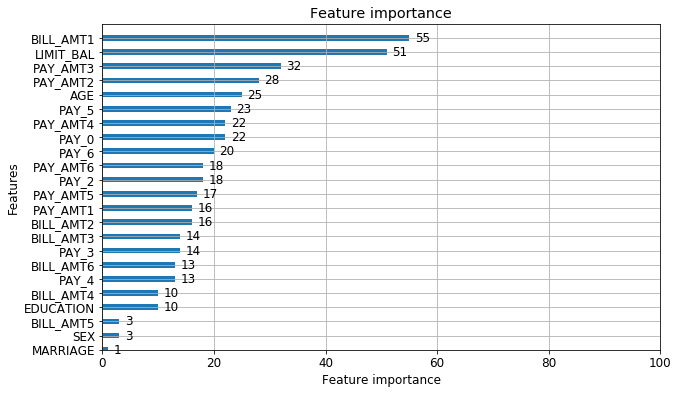

In [226]:
ax = lgb.plot_importance(gbm, height = 0.4, max_num_features=25, xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

<li>In the cell below, we will compare the <b>classification accuracy </b> versus the <b>null accuracy</b> ( the accuracy that could be achieved by always predicting the most frequent class). We must always compare the two.  </li>

In [227]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.82
The roc_auc_score of prediction is: 0.656394946066
The null acccuracy is: 0.7771666666666667


It is a good thing that the prediction accuracy is greater than the null accuracy because it shows us that the model is performing better than just by predicting the most frequent class. 

<h2>Confusion matrix </h2>

In [228]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[4437  226]
 [ 854  483]]




<b>Basic terminology</b>

- <b>True Positives (TP)</b>: we correctly predicted that they would default. 
    - 483
     
     
- <b>True Negatives (TN)</b>: we correctly predicted that they won't default.
    - 4437
     
    
- <b>False Positives (FP)</b>: we incorrectly predicted that they did default.
    - 226
    - Falsely predict positive
    - Type I error
      
       
- <b>False Negatives (FN)</b>: we incorrectly predicted that they didn't default. 
    - 854
    - Falsely predict negative
    - Type II error



In [229]:
y_pred_prob = gbm.predict_proba(X_test)[:, 1]

In [230]:
y_pred_prob

array([ 0.38455002,  0.73701253,  0.3954075 , ...,  0.24069287,
        0.18198491,  0.14800661])

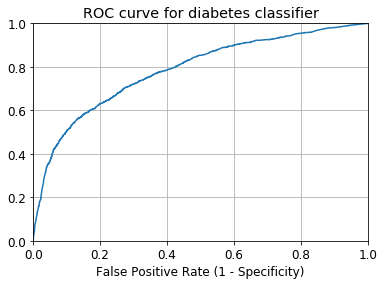

In [231]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid(True)

In [232]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.784981179517




- AUC is useful as a single number summary of classifier performance
- Higher value means that it is a better classifier
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation
- AUC is useful even when there is high class imbalance (unlike classification accuracy)

